In [1]:
import pandas as pd
import re
import nltk
import string

In [2]:
df = pd.read_csv("Amazon_reviews_iphone.csv")

In [3]:
df.head()

,product,title,rating,body
0,Apple iPhone 12 (128GB) - Blue,Kidney as a load balancer,4.0,"Sold kidney bought this, now not feeling well ..."
1,Apple iPhone 12 (128GB) - Blue,Worst battery,3.0,Worst battery performance.Iphone 11 is far bet...
2,Apple iPhone 12 (128GB) - Blue,"Another Fabulous IPhone ( IPhone 12, Blue 64GB)",5.0,The media could not be loaded.\n ...
3,Apple iPhone 12 (128GB) - Blue,This phone is a joke and the joke is on us!!! ...,1.0,Extremely disappointed with this phone. It’s a...
4,Apple iPhone 12 (128GB) - Blue,The Beast,5.0,This was my first switch to an ios device afte...


In [4]:
df.rename(columns={'body':'reviews'}, inplace=True)

In [5]:
df.head()

,product,title,rating,reviews
0,Apple iPhone 12 (128GB) - Blue,Kidney as a load balancer,4.0,"Sold kidney bought this, now not feeling well ..."
1,Apple iPhone 12 (128GB) - Blue,Worst battery,3.0,Worst battery performance.Iphone 11 is far bet...
2,Apple iPhone 12 (128GB) - Blue,"Another Fabulous IPhone ( IPhone 12, Blue 64GB)",5.0,The media could not be loaded.\n ...
3,Apple iPhone 12 (128GB) - Blue,This phone is a joke and the joke is on us!!! ...,1.0,Extremely disappointed with this phone. It’s a...
4,Apple iPhone 12 (128GB) - Blue,The Beast,5.0,This was my first switch to an ios device afte...


In [6]:
df.isnull().sum()

product     0
title       2
rating      0
reviews    45
dtype: int64

In [7]:
df[df['reviews'].isnull()]

,product,title,rating,reviews
74,Apple iPhone 12 (128GB) - Blue,My wife loves it!!,5.0,NaN
518,Apple iPhone 12 (128GB) - Blue,Amazing 👏,5.0,NaN
732,Apple iPhone 12 (128GB) - Blue,Mera Pehla phone iphone 12 experience excellent,5.0,NaN
737,Apple iPhone 12 (128GB) - Blue,"It’s good, worth buying it",5.0,NaN
764,Apple iPhone 12 (128GB) - Blue,Awesome phone,5.0,NaN
810,Apple iPhone 12 (128GB) - Blue,Best iPhone ever,5.0,NaN
853,Apple iPhone 12 (128GB) - Blue,Amazing Phone,5.0,NaN
878,Apple iPhone 12 (128GB) - Blue,Worth it,4.0,NaN
882,Apple iPhone 12 (128GB) - Blue,Unique color 👌,5.0,NaN
883,Apple iPhone 12 (128GB) - Blue,Authentic product. It is a very good product. ...,5.0,NaN


In [8]:
new_df = df[(df['reviews'].isnull()) & (df['rating']>4)]

new_df['reviews'] = new_df['reviews'].fillna('Great')

<ipython-input-8-0e7cb1ac6a60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['reviews'] = new_df['reviews'].fillna('Great')


In [9]:
new_df.drop(columns ='product', axis = 'columns', inplace=True)

D:\Apps\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
new_df.head()

,title,rating,reviews
74,My wife loves it!!,5.0,Great
518,Amazing 👏,5.0,Great
732,Mera Pehla phone iphone 12 experience excellent,5.0,Great
737,"It’s good, worth buying it",5.0,Great
764,Awesome phone,5.0,Great


In [11]:
df.dropna(axis = 'rows', inplace = True)

In [12]:
df.isnull().sum()

product    0
title      0
rating     0
reviews    0
dtype: int64

In [13]:
#Checking how many unique values we have in the product feature
df['product'].unique()

#Since we only have one unique value in this feature we can go ahead and remove this feature as its varince is zero

array(['Apple iPhone 12 (128GB) - Blue'], dtype=object)

In [14]:
df.drop(columns ='product', axis = 'columns', inplace=True)

In [15]:
df = pd.concat([df,new_df], ignore_index=True)

In [16]:
df = df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)
df

,title,rating,reviews
0,kidney as a load balancer,4.0,"sold kidney bought this, now not feeling well ..."
1,worst battery,3.0,worst battery performance.iphone 11 is far bet...
2,"another fabulous iphone ( iphone 12, blue 64gb)",5.0,the media could not be loaded.\n ...
3,this phone is a joke and the joke is on us!!! ...,1.0,extremely disappointed with this phone. it’s a...
4,the beast,5.0,this was my first switch to an ios device afte...
...,...,...,...
1404,delivered on time! and i am happy i bought thi...,5.0,great
1405,best phone as per expections...white colur is ...,5.0,great
1406,superb,5.0,great
1407,satisfactory,5.0,great


In [17]:
punct_to_remove = string.punctuation
print(punct_to_remove)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
#Function to remove punctuations
def remove_punctuation(x):
    return x.translate(str.maketrans("","", punct_to_remove))

In [19]:
df['title'] = df['title'].apply(lambda x: remove_punctuation(x))
df['reviews'] = df['reviews'].apply(lambda x: remove_punctuation(x))

In [20]:
df.head()

,title,rating,reviews
0,kidney as a load balancer,4.0,sold kidney bought this now not feeling well b...
1,worst battery,3.0,worst battery performanceiphone 11 is far bett...
2,another fabulous iphone iphone 12 blue 64gb,5.0,the media could not be loaded\n ...
3,this phone is a joke and the joke is on us don...,1.0,extremely disappointed with this phone it’s a ...
4,the beast,5.0,this was my first switch to an ios device afte...


In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Riyaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [23]:
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

In [24]:
df['title'] = df['title'].apply(lambda text: remove_stopwords(text))
df['reviews'] = df['reviews'].apply(lambda text: remove_stopwords(text))

In [25]:
df

,title,rating,reviews
0,kidney load balancer,4.0,sold kidney bought feeling well number days al...
1,worst battery,3.0,worst battery performanceiphone 11 far better ...
2,another fabulous iphone iphone 12 blue 64gb,5.0,media could loaded another beauty apple upgrad...
3,phone joke joke us don’t buy phone,1.0,extremely disappointed phone it’s seemingly av...
4,beast,5.0,first switch ios device using android untill d...
...,...,...,...
1404,delivered time happy bought it’s amazing phone,5.0,great
1405,best phone per expectionswhite colur amazing,5.0,great
1406,superb,5.0,great
1407,satisfactory,5.0,great


In [26]:
import seaborn as sns
from collections import Counter
cnt = Counter()
for text in df['title'].values:
    for word in text.split():
        cnt[word]+=1
        
cnt.most_common(10)


[('phone', 217),
 ('iphone', 182),
 ('good', 167),
 ('best', 111),
 ('product', 105),
 ('awesome', 86),
 ('12', 74),
 ('apple', 69),
 ('great', 65),
 ('battery', 58)]

<AxesSubplot:xlabel='rating', ylabel='count'>

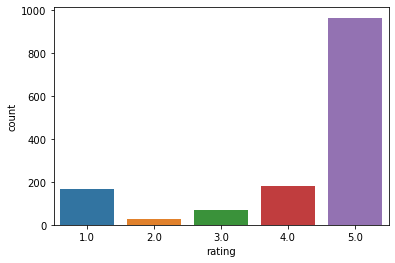

In [27]:
sns.countplot(x= 'rating', data = df)

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Riyaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])



In [30]:
df["title"] = df["title"].apply(lambda text: lemmatize_words(text))
df["reviews"] = df["reviews"].apply(lambda text: lemmatize_words(text))
df

,title,rating,reviews
0,kidney load balancer,4.0,sell kidney buy feel well number day alive one...
1,worst battery,3.0,worst battery performanceiphone 11 far good de...
2,another fabulous iphone iphone 12 blue 64gb,5.0,medium could load another beauty apple upgrade...
3,phone joke joke us don’t buy phone,1.0,extremely disappointed phone it’s seemingly av...
4,beast,5.0,first switch io device use android untill disa...
...,...,...,...
1404,delivered time happy buy it’s amaze phone,5.0,great
1405,best phone per expectionswhite colur amaze,5.0,great
1406,superb,5.0,great
1407,satisfactory,5.0,great


In [31]:
df['rating_u'] = df['rating'].apply(lambda x: 'good' if x>=4 else 'moderate' if x>=2 else 'bad' )

In [32]:
df.head()

,title,rating,reviews,rating_u
0,kidney load balancer,4.0,sell kidney buy feel well number day alive one...,good
1,worst battery,3.0,worst battery performanceiphone 11 far good de...,moderate
2,another fabulous iphone iphone 12 blue 64gb,5.0,medium could load another beauty apple upgrade...,good
3,phone joke joke us don’t buy phone,1.0,extremely disappointed phone it’s seemingly av...,bad
4,beast,5.0,first switch io device use android untill disa...,good


In [33]:
df['rating_u'].value_counts()

good        1147
bad          165
moderate      97
Name: rating_u, dtype: int64

In [34]:
x = df[['title','reviews']]
x.head()

y = df['rating_u']
y.head()

0        good
1    moderate
2        good
3         bad
4        good
Name: rating_u, dtype: object

In [35]:
headline = []
for i in range(0,len(df.index)):
    headline.append(' '.join(str(j) for j in x.iloc[i,:]))

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(headline)
print(x.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [38]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [39]:
# implement RandomForest Classifier

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(x_train,y_train)
y_pred = randomclassifier.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.82      0.35      0.49        26
        good       0.87      1.00      0.93       237
    moderate       0.00      0.00      0.00        19

    accuracy                           0.87       282
   macro avg       0.56      0.45      0.47       282
weighted avg       0.81      0.87      0.83       282



D:\Apps\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Apps\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Apps\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print("Training score: ", randomclassifier.score(x_train, y_train))
print("Testing score: ", randomclassifier.score(x_test, y_test))

Training score:  0.9982253771073647
Testing score:  0.8723404255319149


In [41]:
#Cross_validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(randomclassifier, x, y, cv =5)
print(scores)
print(scores.mean())

[0.86879433 0.85460993 0.84397163 0.83333333 0.85765125]
0.8516720930819515


In [42]:
print(scores.std())

0.012109163762853812


In [54]:
def get_clean(x):
    x = x.lower()
    x = remove_punctuation(x)
    x = remove_stopwords(x)
    x = lemmatize_words(x)
    vec = vectorizer.transform([x])
    pred = randomclassifier.predict(vec)
    return pred

In [55]:
get_clean('waste of money so do not buy it')

array(['bad'], dtype=object)

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(x)


KMeans(max_iter=50, n_clusters=4)

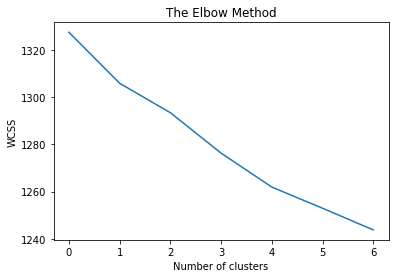

In [72]:
# find the appropriate cluster number
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [73]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.011887480989381185
For n_clusters=3, the silhouette score is 0.015058165253970248
For n_clusters=4, the silhouette score is 0.020628169191373762
For n_clusters=5, the silhouette score is 0.02168925077398247
For n_clusters=6, the silhouette score is 0.025035536045404944
For n_clusters=7, the silhouette score is 0.026640924644799797
For n_clusters=8, the silhouette score is 0.028774909680098555
